In [2]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# If you need to determine the percent voxel change between two images follow these steps first. 

## If you already have a "percent.csv" file, skip to next section

In [3]:
src = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet"
affinefile = os.path.join(src, "output_dirs/Chon_to_PRA_affine/result.tif")
transformixedfile = os.path.join(src, "output_dirs/Chon_for_PRA/result.tif")
annotationsfilename = os.path.join(src,"labels/chon_label_ids.csv")
voxcsv = os.path.join(src,"Chon_to_PRA_vox.csv")
percentcsv = os.path.join(src,"Chon_to_PRA_percent.csv")
transformixed_relative_ZEROED_tiff = os.path.join(src,"Chon_to_PRA_relative_ZEROED.tif")
transformixed_relative_tiff = os.path.join(src,"Chon_to_PRA_relative.tif")

In [10]:
affine = tif.imread("/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/Chon_to_PRA_affine/result.tif")
print("read affine tiff")
transformixed = tif.imread(transformixedfile)
print("read transformixed tiff")

read affine tiff
read transformixed tiff


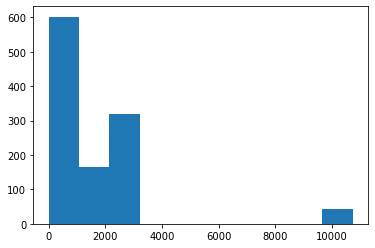

In [29]:
original = tif.imread("/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs/Chon_1_PRA/result.tif")
plt.hist(np.unique(original))A_affine_
plt.show()

In [ ]:
# make sure your annotations have the first column as id number, 2nd as abbreviation, or else change the input below
anns=pd.read_csv(annotationsfilename,usecols=[0,1],header=0,names=['id','abbr'])
print("read annotations")

In [ ]:
df=anns.dropna()
df

In [ ]:
df.insert(2,'affine_vox',0)
df.insert(3,'transformixed_vox',0)


In [ ]:
for i in df['id']:
    df.transformixed_vox[df.index[df.id==i]] = np.size(transformixed[transformixed==i])
    df.affine_vox[df.index[df.id==i]] = np.size(affine[affine==i])


In [ ]:
df

In [ ]:
df['change'] = df['affine_vox']-df['transformixed_vox']

In [ ]:
dfwithzero=df

In [ ]:
df = df[df.transformixed_vox > 0]
df

In [ ]:
dfpercent = (df['change']/df['transformixed_vox'])*100
dfpercent[np.isinf(dfpercent)]=0
df['percent'] = dfpercent
dfpercent.replace(0,np.nan)

In [ ]:
plt.hist(df.percent,bins=100)
plt.show()

In [ ]:
mp = np.nanmedian(df.percent)
sp = np.nanstd(df.percent)

In [ ]:
highmp = mp+sp
highmp

In [ ]:
lowmp = mp-sp
lowmp

In [ ]:
df.to_csv(percentcsv)

In [ ]:
df=pd.read_csv(percentcsv)

In [ ]:
df

In [ ]:
too = df.id
zeroed = dfwithzero.id

In [ ]:
transformixed_relative = transformixed

In [ ]:
# add list of unique values not in twoxh/twoxl but in transformixed
x = np.unique(affine)
plt.hist(x,bins=1000)
plt.show()

In [ ]:
test = np.setdiff1d(x,too)
test[1:20]

In [ ]:
for i in test:
    transformixed_relative[transformixed_relative==i]=0

In [ ]:
tif.imsave(transformixed_relative_ZEROED_tiff,transformixed_relative)

In [ ]:
for i in too:
    transformixed_relative[transformixed_relative==i]=df.loc[df['id']==i,'percent'].iloc[0]

In [ ]:
tif.imsave(transformixed_relative_tiff,transformixed_relative)

# If you already have a percent file

In [ ]:
df=pd.read_csv(percentcsv)

In [ ]:
plt.hist(df.percent[df.affine_vox>5],bins=100)

dfmean = np.nanmean(df.percent[df.affine_vox>5])
dfmedian = np.nanmedian(df.percent[df.affine_vox>5])
dfstd = np.std(df.percent[df.affine_vox>5])
mp = dfmean + dfstd
mm = dfmean - dfstd

mp2 = dfmean + 2*dfstd
mp3 = dfmean + 3*dfstd
mm2 = dfmean - 2*dfstd
mm3 = dfmean - 3*dfstd


plt.plot([dfmean, dfmean],[0,25],'r')
plt.plot([dfmedian, dfmedian],[0,25],'k')
plt.plot([mp,mp],[0,25],'c')
plt.plot([mm,mm],[0,25],'c')
plt.plot([mp2,mp2],[0,25],'c')
plt.plot([mm2,mm2],[0,25],'c')
plt.show()

In [ ]:
# want to make summary -- ideally show a ranked 3, 2, 1std>mean 
# in diff colors, and then the 
# values either written or in bar form on the right

df

In [ ]:
df2p = df[df.percent>mp2]
df2p = df2p.sort_values('percent',ascending=False)
df2m = df[df.percent < mm2]
df2m = df2m.sort_values('percent',ascending=False)

In [ ]:
df2m

In [ ]:
df2p

In [ ]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()

In [ ]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()